# Get forecast for a specific spot

In [68]:
%load_ext autoreload
%autoreload 2
import requests
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import datetime
import pandas as pd

from pysurfline import SpotForecast,URLBuilder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
types=["wave","wind","tides","weather"]
params={"spotId":"584204204e65fad6a7709b09"}
f=[]
for type in types:
    print("-----")
    forecast=SpotForecast(type,params)
    print(forecast.url)
    print(forecast)
    f.append(forecast)

-----
https://services.surfline.com/kbyg/spots/forecasts/wave?spotId=584204204e65fad6a7709b09
SpotForecast(Type:wave, Status:200)
-----
https://services.surfline.com/kbyg/spots/forecasts/wind?spotId=584204204e65fad6a7709b09
SpotForecast(Type:wind, Status:200)
-----
https://services.surfline.com/kbyg/spots/forecasts/tides?spotId=584204204e65fad6a7709b09
SpotForecast(Type:tides, Status:200)
-----
https://services.surfline.com/kbyg/spots/forecasts/weather?spotId=584204204e65fad6a7709b09
SpotForecast(Type:weather, Status:200)


In [70]:
waves=f[0].get_dataframe("wave")
waves.head()

,timestamp,utcOffset,surf_min,surf_max,surf_optimalScore,swells
0,2022-02-12 23:00:00,1,0.0,0.16,0,"[{'height': 0.89362, 'period': 4, 'direction':..."
1,2022-02-13 00:00:00,1,0.0,0.16,0,"[{'height': 0.81023, 'period': 4, 'direction':..."
2,2022-02-13 01:00:00,1,0.0,0.17,0,"[{'height': 0.74594, 'period': 4, 'direction':..."
3,2022-02-13 02:00:00,1,0.0,0.18,0,"[{'height': 0.67722, 'period': 4, 'direction':..."
4,2022-02-13 03:00:00,1,0.0,0.20,0,"[{'height': 0.61241, 'period': 4, 'direction':..."


In [71]:
surf=waves.copy()[["timestamp","surf_min",	"surf_max"]]
surf["timestamp"]=pd.to_datetime(surf["timestamp"])
surf=surf.set_index("timestamp")
surf=surf.resample("3H").mean()

days=7
surf=surf.loc[:surf.index[0]+datetime.timedelta(days=7)]
surf.head()

,surf_min,surf_max
timestamp,,
2022-02-12 21:00:00,0.0,0.160000
2022-02-13 00:00:00,0.0,0.170000
2022-02-13 03:00:00,0.0,0.200000
2022-02-13 06:00:00,0.0,0.190000
2022-02-13 09:00:00,0.0,0.163333


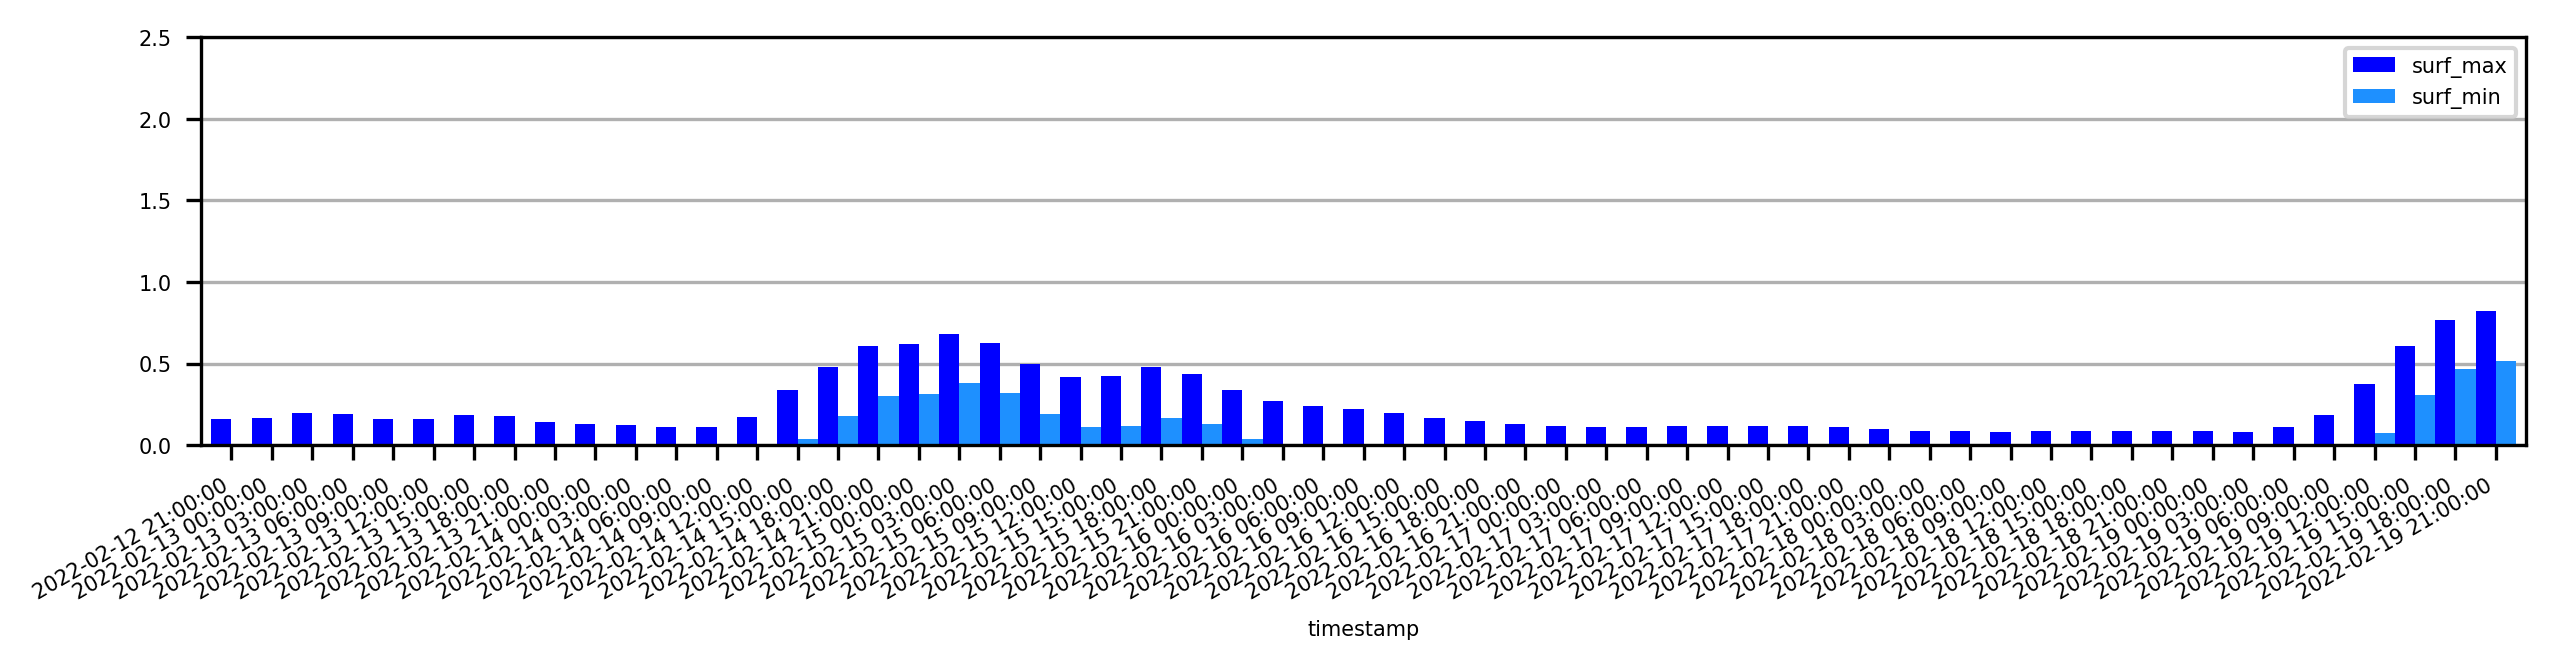

In [72]:
matplotlib.rcParams.update({'font.size': 5})
f,ax=plt.subplots(figsize=(10,2),dpi=300)
ax.xaxis.set_major_formatter("%d-%b")

surf.plot.bar(y=["surf_max","surf_min"],color=["blue","dodgerblue"],ax=ax,zorder=2,width=1)
ax.set_ylim([0,2.5])
ax.grid(axis="y",zorder=0)
ax.figure.autofmt_xdate()
# date_fmt = '%d-%b %H'
# years = mdates.DayLocator()   # every year
# # yearsFmt = mdates.DateFormatter(date_fmt)

# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)
